In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from IPython.display import display, HTML
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("data/housing.csv", sep=";")

Aufgabe 1:
Teil 1:
- Mehrdimensionale Lineare Regression auf einem Datensatz (https://github.com/ageron/handson-ml/blob/master/datasets/housing/)
- Vorverarbeitung der Daten (Skalierung, kategorische Attribute: http://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features)
- Aufteilung in Test & Train
- Berechnung der Fehler der Vorhersage auf dem Test-Datensatz
- Anpassung der Inputdaten (Feature Engineering)
- Niedrigster MSE auf einem (für alle der gleiche) Test-Datensatz gewinnt
Teil 2
So wie Teil 1 nur mit kNeighborsRegression als Vorhersageverfahren

# Looking at the data

In [3]:
print(data.isnull().sum().sum()) #nr of nans
#data.isnull().values.any() # only gives true/false
print(data.shape)

207
(20640, 10)


In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Preprocessing

### Encoding categorical features

In [6]:
enc_labels = preprocessing.LabelEncoder()
enc_ohe = preprocessing.OneHotEncoder(sparse=False) #easier to read

In [7]:
enc_labels.fit(data["ocean_proximity"])
new_ocean_prox = enc_labels.transform(data["ocean_proximity"])
print(new_ocean_prox)
new_ocean_arr = enc_ohe.fit_transform(new_ocean_prox.reshape(-1, 1))
new_ocean_df = pd.DataFrame(data = new_ocean_arr, columns = list(enc_labels.classes_))

[3 3 3 ... 1 1 1]


In [8]:
data_new = pd.concat([data,new_ocean_df],axis=1)
display(data_new)
data_new.drop("ocean_proximity",axis = 1,inplace = True)
data_new

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,0.0,0.0,0.0,1.0,0.0
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY,0.0,0.0,0.0,1.0,0.0
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY,0.0,0.0,0.0,1.0,0.0
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,NEAR BAY,0.0,0.0,0.0,1.0,0.0
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,NEAR BAY,0.0,0.0,0.0,1.0,0.0
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,261100,NEAR BAY,0.0,0.0,0.0,1.0,0.0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0.0,0.0,0.0,1.0,0.0
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,0.0,0.0,0.0,1.0,0.0
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,0.0,0.0,0.0,1.0,0.0
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,0.0,0.0,0.0,1.0,0.0
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,0.0,0.0,0.0,1.0,0.0
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,261100,0.0,0.0,0.0,1.0,0.0


### (Replacing NaNs)

In [9]:
# replacing the 207 NaNs in column total_bedroom by mean of the column

In [10]:
"""
data_new["total_bedrooms"].fillna(data_new["total_bedrooms"].mean(),inplace = True)
with pd.option_context('display.max_rows', 1000, 'display.max_columns', 300): # shows more of the df
    display(data_new["total_bedrooms"])
    """

'\ndata_new["total_bedrooms"].fillna(data_new["total_bedrooms"].mean(),inplace = True)\nwith pd.option_context(\'display.max_rows\', 1000, \'display.max_columns\', 300): # shows more of the df\n    display(data_new["total_bedrooms"])\n    '

## Scatter matrices

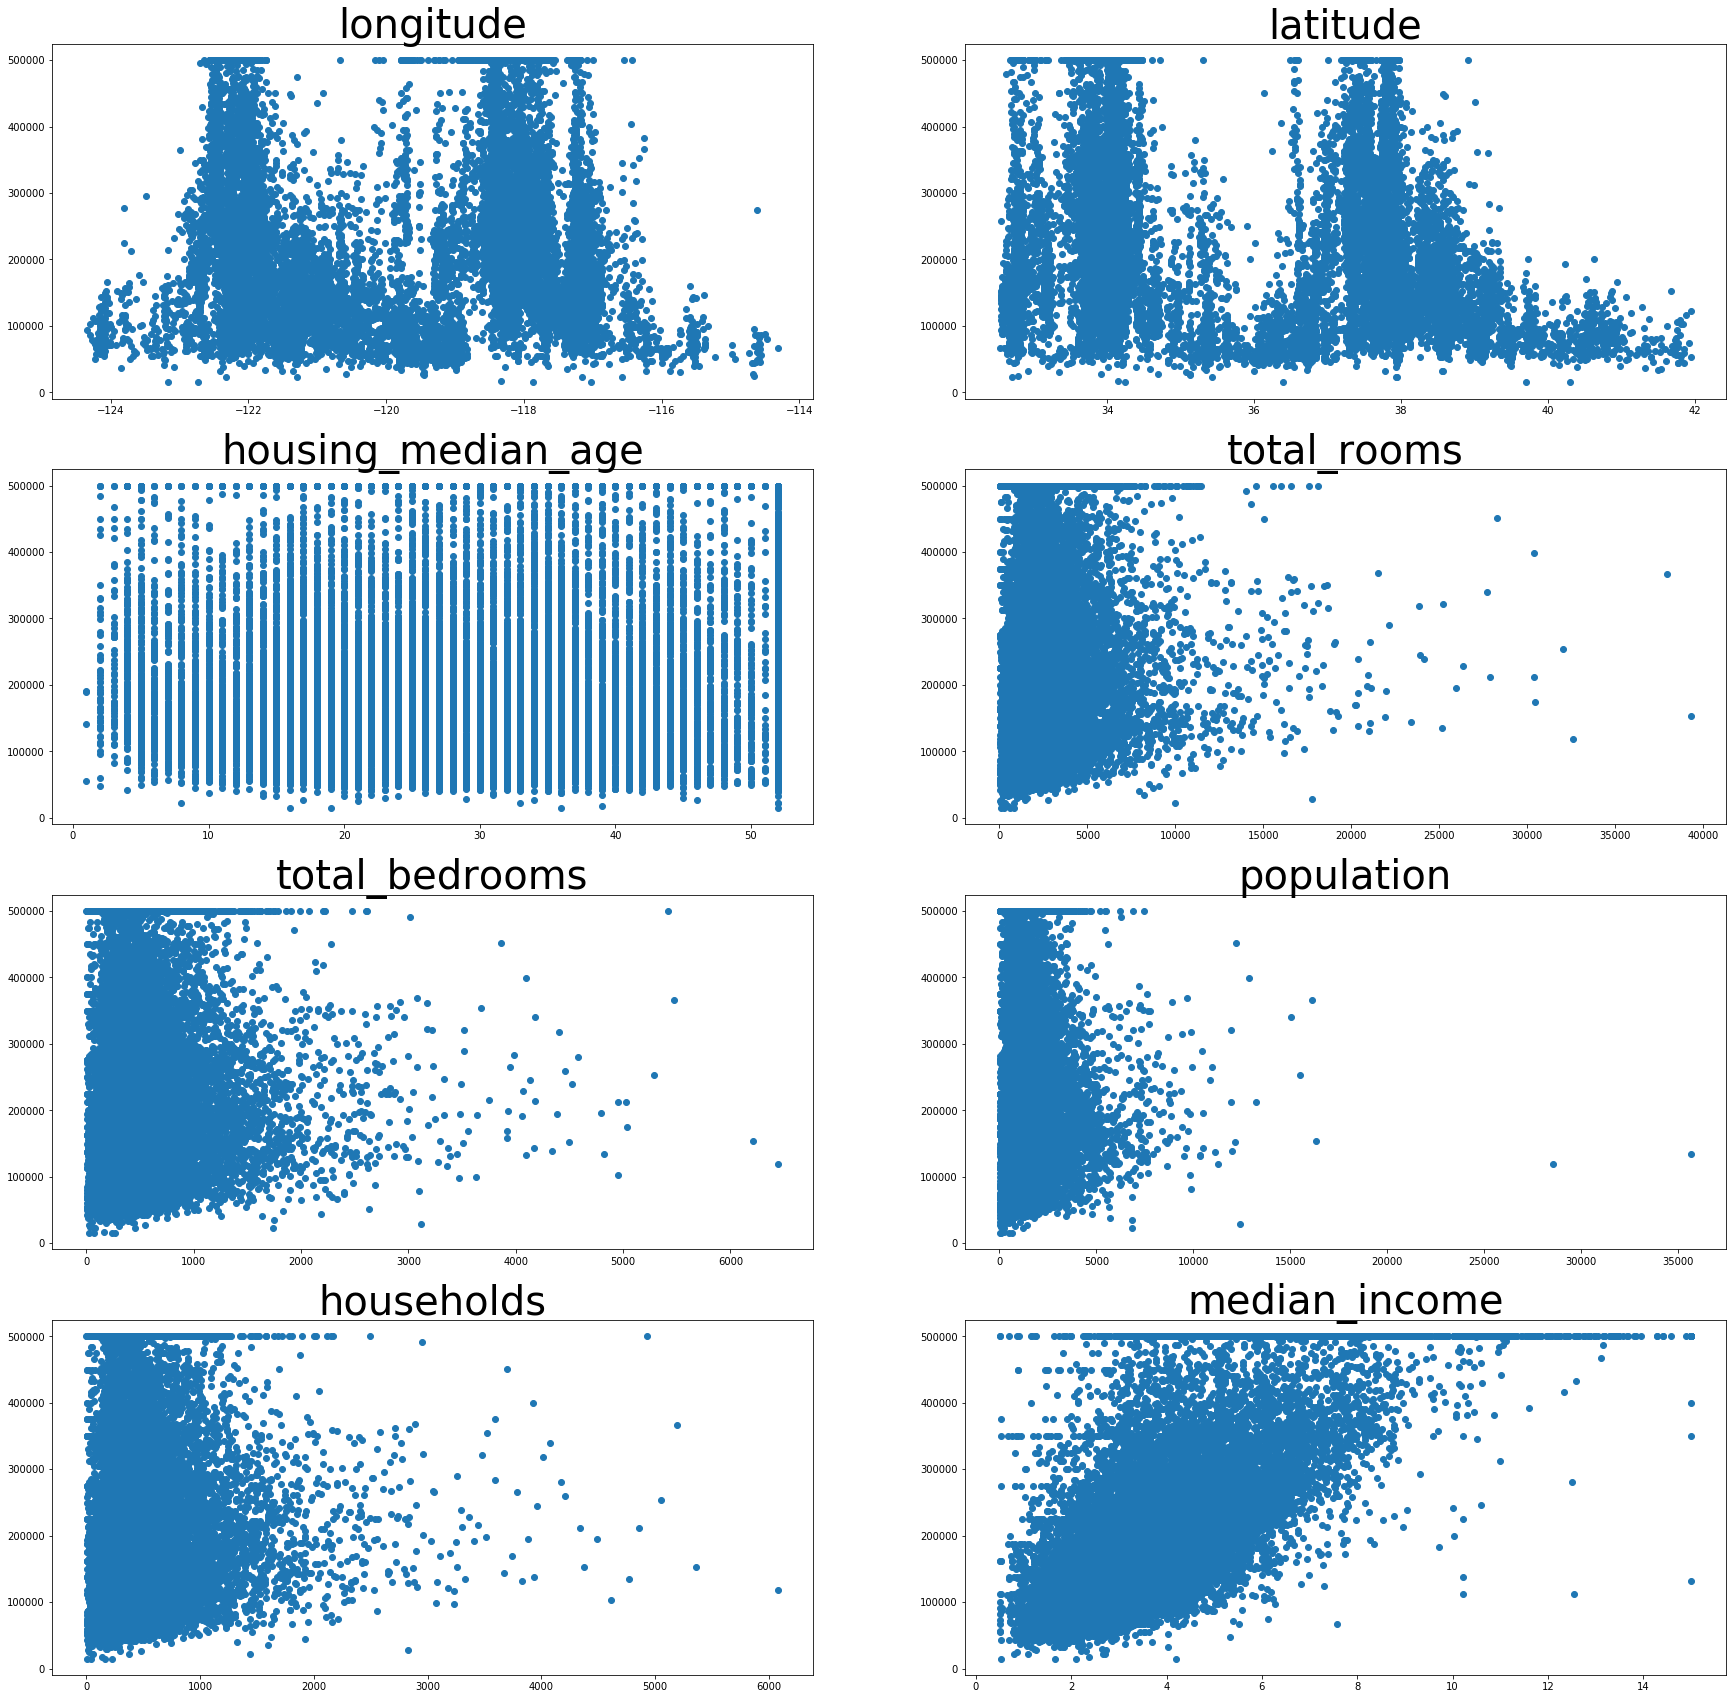

In [11]:
fig = plt.figure(figsize = (30,30))
for col in range(0,8):
    plt.subplot(4,2,col+1)
    plt.scatter(data_new.iloc[:,col],data_new["median_house_value"])
    plt.title(data_new.columns[col],fontsize=40)

In [12]:
"""
Axes = scatter_matrix(data_new.iloc[:,0:9], alpha=0.2, figsize=(60, 60), diagonal='hist')

#y ticklabels
[plt.setp(item.yaxis.get_majorticklabels(), 'size', 15) for item in Axes.ravel()]
#x ticklabels
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 5) for item in Axes.ravel()]
#y labels
[plt.setp(item.yaxis.get_label(), 'size', 20) for item in Axes.ravel()]
#x labels
[plt.setp(item.xaxis.get_label(), 'size', 3) for item in Axes.ravel()]
"""

"\nAxes = scatter_matrix(data_new.iloc[:,0:9], alpha=0.2, figsize=(60, 60), diagonal='hist')\n\n#y ticklabels\n[plt.setp(item.yaxis.get_majorticklabels(), 'size', 15) for item in Axes.ravel()]\n#x ticklabels\n[plt.setp(item.xaxis.get_majorticklabels(), 'size', 5) for item in Axes.ravel()]\n#y labels\n[plt.setp(item.yaxis.get_label(), 'size', 20) for item in Axes.ravel()]\n#x labels\n[plt.setp(item.xaxis.get_label(), 'size', 3) for item in Axes.ravel()]\n"

### Dropping rows with NaNs

In [13]:
data_new["total_bedrooms"].isnull().sum()

207

In [14]:
cols = data_new.columns.tolist()
cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [15]:
data_new.dropna(inplace = True)
data_new.reset_index(inplace = True)
data_new.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0.0,0.0,0.0,1.0,0.0
1,1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0.0,0.0,0.0,1.0,0.0
2,2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0.0,0.0,0.0,1.0,0.0
3,3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0.0,0.0,0.0,1.0,0.0
4,4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0.0,0.0,0.0,1.0,0.0


In [16]:
data_new = data_new[['longitude','latitude','housing_median_age','total_rooms', 'total_bedrooms', 'population', 'households','median_income','<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN','median_house_value']]

In [17]:
with pd.option_context('display.max_rows', 1000, 'display.max_columns', 300): # shows more of the df
    display(data_new)
data_new.shape

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0.0,0.0,0.0,1.0,0.0,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0.0,0.0,0.0,1.0,0.0,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0.0,0.0,0.0,1.0,0.0,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0.0,0.0,0.0,1.0,0.0,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0.0,0.0,0.0,1.0,0.0,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,0.0,0.0,0.0,1.0,0.0,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,0.0,0.0,0.0,1.0,0.0,299200
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,0.0,0.0,0.0,1.0,0.0,241400
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,0.0,0.0,0.0,1.0,0.0,226700
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,0.0,0.0,0.0,1.0,0.0,261100


(20433, 14)

In [18]:
"""import seaborn as sns
sns.set(style="ticks")
plot_vars = data_new.iloc[:,[0,1,2,3,4,5,6,7,8]]
sns.pairplot(plot_vars)
"""

'import seaborn as sns\nsns.set(style="ticks")\nplot_vars = data_new.iloc[:,[0,1,2,3,4,5,6,7,8]]\nsns.pairplot(plot_vars)\n'

In [19]:
#input_data.loc[:, input_data.columns != 'median_house_value']

In [60]:
class Analysis: 
    def __init__(self):
        self.results = pd.DataFrame()
        
        self.input_data = {} # dict of dicts
        self.analysis_names = []
        self.config_names = []
        self.configs = []
        self.analysis_summaries = {}
        

    def get_rates(self):
        return self.rates
    
    def get_results(self):
        return self.results

    def add_input_prep(self, input_data_name, input_data, colidx_with_cont_data = list(range(0,8))):
        """input_data should be a manipulated version of data_new (i.e. ocean proximity 
        already converted, NaNs in total bedrooms already dropped,index reset, )"""
        if input_data_name not in self.input_data:
            
            self.input_data[input_data_name] = {'raw_data': input_data}

            #split in train and test
            splitdata = {}
            self.input_data[input_data_name]["prep_data"] = splitdata
            splitdata["train_X"], splitdata["test_X"], splitdata["train_y"],splitdata["test_y"] = train_test_split(self.input_data[input_data_name]["raw_data"].loc[:, self.input_data[input_data_name]["raw_data"].columns != 'median_house_value'],\
                                                               self.input_data[input_data_name]["raw_data"]["median_house_value"], test_size=0.2, random_state=42)
            nr_features = splitdata["train_X"].shape[1]
            print(f"Scaled features: {splitdata['train_X'].iloc[:,colidx_with_cont_data].columns.values}")

            #standard scaling of continuous variables
            scaler = preprocessing.StandardScaler()
            train_df_cont = self.input_data[input_data_name]["prep_data"]["train_X"].iloc[:,colidx_with_cont_data]
            #display(train_df_cont)
            scaler.fit(train_df_cont) 
            self.input_data[input_data_name]["prep_data"]["train_X"].iloc[:,colidx_with_cont_data] = scaler.transform(train_df_cont)
            self.input_data[input_data_name]["prep_data"]["test_X"].iloc[:,colidx_with_cont_data] = scaler.transform(self.input_data[input_data_name]["prep_data"]["test_X"].iloc[:,colidx_with_cont_data])

            return self.input_data
        else:
            print("Input data name already exists!")
    
    def run_analysis(self,analysis_name,input_data_name,conf_name,):
        self.analysis_summaries[analysis_name] = {"input_data_name":input_data_name,"conf_name":conf_name}
        train_X, test_X, train_y, test_y = self.input_data[input_data_name]['prep_data']["train_X"],\
            self.input_data[input_data_name]['prep_data']["test_X"],\
            self.input_data[input_data_name]['prep_data']["train_y"],\
            self.input_data[input_data_name]['prep_data']["test_y"]
        print("this is train_y:")
        display(train_y)
        for conf in self.configs:
            if conf['fit'] == -1 and conf['config_name'] == conf_name:
                conf['fit'] = conf['algo'].fit(train_X, train_y) 
                pred = conf['algo'].predict(test_X)
                self.results[analysis_name] = pred 
                mse= mean_squared_error(self.results[analysis_name],test_y)
                rmse = np.sqrt(mse)
                self.analysis_summaries[analysis_name]["RMSE"] = rmse
                print(f"\nRMSE: {rmse}")
                R2 = conf['fit'].score(test_X, test_y)
                print(f"R2: {R2}")
                self.analysis_summaries[analysis_name]["R2"] = R2
                print("this is self.results[analysis_name]:")
                print(self.results[analysis_name])
                print("this is test_y:")
                print(test_y)
                print("this is pred:")
                print(pred)
                print(type(test_y))
                rss = (sum(pred - test_y))**2
                print(f"RSS: {rss}")
                rse = np.sqrt(rss/(len(train_X)-2))
                print(f"RSE: {rse}")
                self.analysis_summaries[analysis_name]["RSE"] = rse
                
    def calculate_error_rates(self):     
        rates = pd.DataFrame(columns = ["Input DF","Config Name","R2","RMSE","RSE"],index = self.analysis_summaries.keys())
        for ana in self.analysis_summaries:
            print(ana)
            rates.loc[ana,"Input DF"] = self.analysis_summaries[ana]["input_data_name"]
            rates.loc[ana,"Config Name"] = self.analysis_summaries[ana]["conf_name"]
            rates.loc[ana,"R2"] = self.analysis_summaries[ana]["R2"]
            rates.loc[ana,"RMSE"] = self.analysis_summaries[ana]["RMSE"]
            rates.loc[ana,"RSE"] = self.analysis_summaries[ana]["RSE"]
            
        display(rates)
                

        
    def todo(self):

        lin_coefficients = lin.coef_
        coef_df = pd.DataFrame(data = lin_coefficients.reshape(1,nr_features),columns = train_X.columns)
        print(analysis_name + " Linear Regression")
        print("Beta coefficients:")
        display(coef_df)



    def add_config(self, algo, conf_name):
        if conf_name not in self.config_names:
            self.config_names.append(conf_name)
            self.configs.append({ 'config_name': conf_name, 'algo': algo,'fit': -1})
        else: print("config already exists!!")
            
    def delete_analysis(self,name):
        pass
        

In [61]:
analysis = Analysis()
analysis.add_input_prep("orig_data",data_new,list(range(0,8)))
analysis.add_input_prep("no_coords",data_new.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13]],list(range(0,6)))
analysis.add_input_prep("orig_data",data_new,list(range(0,8)))
analysis.input_data
analysis.add_config(KNeighborsRegressor(n_neighbors=3), 'knr_3') 
analysis.add_config(linear_model.LinearRegression(),'normal_linear')
print(analysis.configs)
analysis.run_analysis('knr3_orig','orig_data','knr_3')


Scaled features: ['longitude' 'latitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income']
Scaled features: ['housing_median_age' 'total_rooms' 'total_bedrooms' 'population'
 'households' 'median_income']
Input data name already exists!
[{'config_name': 'knr_3', 'algo': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform'), 'fit': -1}, {'config_name': 'normal_linear', 'algo': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False), 'fit': -1}]
this is train_y:


17560    227600
2045     110400
6383     248100
4574     305600
15118    214600
6750     227300
8295     177200
2736      84700
17971    451400
15470    500001
1208     122600
11286    318200
19054    265600
6181     155700
1090      87500
3120      83200
10969    244900
5099      94400
14544    177400
1533     260300
11934    108800
1411     250000
4110     173600
2614      85100
2636      70700
5026      95800
16925    166700
2664      70700
19276    114300
10528    313400
          ...  
1267     186300
1899      87500
3005      63800
19118    222400
189       95500
2747      53800
18431    154500
18942    285000
8666     359900
6396     248900
19769     47700
17568    235600
6420     166300
5051     133500
5311     500001
2433      70100
769      194400
1685     248700
8322     149100
16023     63300
11363    302500
14423    183900
4426     175000
16850    286700
6265     297600
11284    273400
11964    160800
5390     335400
860      231200
15795    251800
Name: median_house_value


RMSE: 63961.82961296867
R2: 0.7008364487866838
this is self.results[analysis_name]:
0       144833.333333
1       146900.000000
2       190633.333333
3       151333.333333
4       147966.666667
5        84166.666667
6       300333.333333
7       205166.666667
8       406800.333333
9        75066.666667
10      165466.666667
11      114733.333333
12      209566.666667
13      179166.666667
14      127300.000000
15      132300.000000
16      200633.333333
17      246100.000000
18      184600.000000
19      359433.333333
20      192000.000000
21      152533.333333
22      207866.666667
23       67200.000000
24      145066.666667
25      287266.666667
26      239366.666667
27      192000.000000
28      258500.000000
29      100866.666667
            ...      
4057    327300.000000
4058    378800.000000
4059     68666.666667
4060    128733.333333
4061    162566.666667
4062    203633.333333
4063    151400.000000
4064    164633.333333
4065    172700.000000
4066     90066.666667
4067    11563

In [62]:
analysis.run_analysis('lin_orig','orig_data','normal_linear')
analysis.results
analysis.analysis_summaries

this is train_y:


17560    227600
2045     110400
6383     248100
4574     305600
15118    214600
6750     227300
8295     177200
2736      84700
17971    451400
15470    500001
1208     122600
11286    318200
19054    265600
6181     155700
1090      87500
3120      83200
10969    244900
5099      94400
14544    177400
1533     260300
11934    108800
1411     250000
4110     173600
2614      85100
2636      70700
5026      95800
16925    166700
2664      70700
19276    114300
10528    313400
          ...  
1267     186300
1899      87500
3005      63800
19118    222400
189       95500
2747      53800
18431    154500
18942    285000
8666     359900
6396     248900
19769     47700
17568    235600
6420     166300
5051     133500
5311     500001
2433      70100
769      194400
1685     248700
8322     149100
16023     63300
11363    302500
14423    183900
4426     175000
16850    286700
6265     297600
11284    273400
11964    160800
5390     335400
860      231200
15795    251800
Name: median_house_value


RMSE: 69297.7166911303
R2: 0.6488402154431995
this is self.results[analysis_name]:
0       201882.959868
1       147279.682144
2       207796.609798
3       180487.576722
4       190323.923130
5        95437.897104
6       287156.451612
7       257624.771805
8       385383.556151
9        62548.197551
10        4806.246290
11      108258.338574
12      255513.159940
13      202556.268444
14       65630.467136
15      181214.852140
16      218431.185221
17      286810.221661
18      208135.512604
19      271989.385113
20      238248.825780
21      162417.466399
22      223215.954212
23       74212.807798
24      221010.788578
25      265144.443628
26      265868.581747
27      244099.752430
28      251319.936096
29       91225.479167
            ...      
4057    282332.386489
4058    297843.970070
4059     85776.275518
4060    118425.487494
4061    186444.800864
4062    192016.617882
4063    132517.609190
4064    164347.193677
4065    138777.973383
4066    145648.874792
4067     96923

{'knr3_orig': {'input_data_name': 'orig_data',
  'conf_name': 'knr_3',
  'RMSE': 63961.82961296867,
  'R2': 0.7008364487866838,
  'RSE': 157657.09094422113},
 'lin_orig': {'input_data_name': 'orig_data',
  'conf_name': 'normal_linear',
  'RMSE': 69297.7166911303,
  'R2': 0.6488402154431995,
  'RSE': 47126.527814539644}}

In [63]:
analysis.calculate_error_rates()

knr3_orig
lin_orig


,Input DF,Config Name,R2,RMSE,RSE
knr3_orig,orig_data,knr_3,0.700836,63961.8,157657
lin_orig,orig_data,normal_linear,0.64884,69297.7,47126.5


In [ ]:
its_magic("All Vars",data_new)

In [ ]:
selected_data = data_new.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13]]
selected_data.head()

In [ ]:
its_magic("Without coordinates",selected_data,list(range(0,6)))

In [ ]:
# Ohne ocean proximity
selected_data = data_new.iloc[:,[0,1,2,3,4,5,6,7,13]]
selected_data.head()

In [ ]:
its_magic("Without OceanProx",selected_data,list(range(0,8)))

In [ ]:
# Nur mit income
selected_data = data_new.iloc[:,[7,13]]
selected_data.head()

In [ ]:
its_magic("Only Income",selected_data,list(range(1)))

In [ ]:
def its_magic(analysis_name,input_data,colidx_with_cont_data = list(range(0,8))):
    """input_data should be a manipulated version of data_new (i.e. ocean proximity 
    already converted, NaNs in total bedrooms already dropped,index reset, )"""
    #colidx_with_cont_data = list(range(0,8))
    #analysis_name = "test"
    
    #split in train and test
    train_X, test_X, train_y,test_y = train_test_split(input_data.loc[:, input_data.columns != 'median_house_value'],\
                                                       input_data["median_house_value"], test_size=0.2, random_state=42)
    nr_features = train_X.shape[1]
    
    print(f"Scaled features: {train_X.iloc[:,colidx_with_cont_data].columns.values}")
    
    #standard scaling of continuous variables
    scaler = preprocessing.StandardScaler()
    scaler.fit(train_X.iloc[:,colidx_with_cont_data]) 
    train_X.iloc[:,colidx_with_cont_data] = scaler.transform(train_X.iloc[:,colidx_with_cont_data])
    test_X.iloc[:,colidx_with_cont_data] = scaler.transform(test_X.iloc[:,colidx_with_cont_data])
    
    #LinReg
    lin = linear_model.LinearRegression()
    lin.fit(train_X, train_y) 
    lin_pred = lin.predict(test_X)
    lin_coefficients = lin.coef_
    coef_df = pd.DataFrame(data = lin_coefficients.reshape(1,nr_features),columns = train_X.columns)
    print(analysis_name + " Linear Regression")
    print("Beta coefficients:")
    display(coef_df)
    mse_lin= mean_squared_error(lin_pred,test_y)
    rmse_lin = np.sqrt(mse_lin)
    print(f"\nRMSE: {rmse_lin}")
    R2_lin = lin.score(test_X, test_y)
    print(f"R2: {R2_lin}")
    rss_lin = (sum((lin_pred - test_y)))**2
    print(f"RSS: {rss_lin}")
    rse_lin = np.sqrt(rss_lin/(len(train_X)-2))
    print(f"RSE: {rse_lin}")
    
    #KNR
    knr = KNeighborsRegressor(n_neighbors=5,weights = "distance")
    knr.fit(train_X, train_y) 
    knr_pred = knr.predict(test_X)
    
    print("\n"+analysis_name + " KNR")
    mse_knr= mean_squared_error(knr_pred,test_y)
    rmse_knr = np.sqrt(mse_knr)
    print(f"\nRMSE: {rmse_knr}")
    R2_knr = knr.score(test_X, test_y)
    print(f"R2: {R2_knr}")
    rss_knr = (sum((knr_pred - test_y)))**2
    print(f"RSS: {rss_knr}")
    rse_knr= np.sqrt(rss_knr/(len(train_X)-2))
    print(f"RSE: {rse_knr}")
